In [284]:
import os
import pandas as pd
import numpy as np
import muon as mu
from mudata import MuData

import networkx as nx
import igraph as ig

import matplotlib.pyplot as plt

from typing import List, Tuple, Dict, Any, Optional

In [285]:
os.chdir("/cellar/users/aklie/opt/CRISPR-JAMBOREE")

In [286]:
mdata = mu.read_h5mu("single-cell/inference/PerTurbo-Python/gasperini_inference_output_perturbo.h5mu")
mdata

/cellar/users/aklie/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/cellar/users/aklie/opt/miniconda3/envs/test_celloracle/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 9704 × 167
  obs:	'prep_batch', 'within_batch_chip', 'within_chip_lane'
  uns:	'pairs_to_test', 'test_results'
  2 modalities
    gene:	9704 x 112
      obs:	'num_expressed_genes', 'total_gene_umis'
      var:	'symbol', 'gene_chr', 'gene_start', 'gene_end'
    guide:	9704 x 55
      obs:	'num_expressed_guides', 'total_guide_umis'
      var:	'targeting', 'intended_target_name', 'intended_target_chr', 'intended_target_start', 'intended_target_end'
      uns:	'capture_method', 'moi'
      layers:	'guide_assignment'

In [287]:
results_df = mdata.uns["test_results"]
results_df["-log10_posterior_probability"] = -np.log10(results_df["posterior_probability"])
results_df.iloc[:50]

,intended_target_name,gene_id,posterior_probability,log2_fc,-log10_posterior_probability
0,ENSG00000114850,ENSG00000114850,1.173906e-140,-2.837359,139.930367
1,ENSG00000187109,ENSG00000187109,2.978012e-77,-0.946061,76.526074
2,ENSG00000181610,ENSG00000181610,2.515201e-64,-1.993496,63.599427
3,ENSG00000134851,ENSG00000134851,1.988484e-61,-1.203412,60.701478
4,ENSG00000163866,ENSG00000163866,1.062056e-53,-1.579744,52.973853
5,ENSG00000113552,ENSG00000113552,3.524085e-53,-2.025771,52.452954
6,ENSG00000012660,ENSG00000012660,6.176088e-34,-1.353762,33.209286
7,candidate_enh_1,ENSG00000147454,3.642015e-20,-0.923445,19.438658
8,candidate_enh_4,ENSG00000165702,1.285547e-18,-1.170653,17.890912
9,ENSG00000143321,ENSG00000143321,5.745756e-17,-0.558912,16.240653


In [288]:
# Turn into a function
def add_nontargeting_gene_exp_col(
    mdata: MuData,
):
    # Get the guides that were non-targeting
    nontargeting_mask = mdata.mod["guide"].var["intended_target_name"] == "non-targeting"
    targeting_mask = ~nontargeting_mask

    # Get the counts across barcodes for the non-targeting guides and the targeting guides
    nontargeting_counts = mdata.mod["guide"][:, nontargeting_mask].copy()
    targeting_counts = mdata.mod["guide"][:, targeting_mask].copy()

    # Determine the barcodes that recieved at least one non-targeting guides (non-zero counts) AND no targeting guides (zero counts)
    cells_with_nontargeting_mask = nontargeting_counts.obs.index[(np.sum(nontargeting_counts.X, axis=1) > 0).A.ravel()]
    cells_with_no_targeting_mask = targeting_counts.obs.index[(np.sum(targeting_counts.X, axis=1) == 0).A.ravel()]
    cells_with_only_nontargeting = np.intersect1d(cells_with_nontargeting_mask, cells_with_no_targeting_mask)
    
    # 
    nontargeting_adata = mdata.mod["gene"][cells_with_only_nontargeting].copy()
    
    # Get gene expression pd.Series where the index is the gene name and the values are the mean expression across cells
    gene_expression = nontargeting_adata.X.mean(axis=0).A1
    mdata.mod["gene"].var["mean_nontargeting_expression"] = gene_expression

In [289]:
add_nontargeting_gene_exp_col(mdata)

In [290]:
mdata.mod["gene"].var.sort_values("mean_nontargeting_expression", ascending=False).head(10)

,symbol,gene_chr,gene_start,gene_end,mean_nontargeting_expression
ENSG00000197958,RPL12,chr9,130213651.0,130213652.0,82.793296
ENSG00000148303,RPL7A,chr9,136215069.0,136215070.0,69.203290
ENSG00000198899,,,NaN,NaN,30.174736
ENSG00000187109,NAP1L1,chr12,76478445.0,76478446.0,12.366543
ENSG00000136938,ANP32B,chr9,100745643.0,100745644.0,11.421477
ENSG00000119335,SET,chr9,131445934.0,131445935.0,11.010863
ENSG00000171159,C9orf16,chr9,130922539.0,130922540.0,7.300745
ENSG00000147454,SLC25A37,chr8,23386318.0,23386319.0,6.720670
ENSG00000122644,ARL4A,chr7,12726481.0,12726482.0,5.762259
ENSG00000135046,ANXA1,chr9,75766673.0,75766674.0,3.286778


In [291]:
def plot_network(
    mdata: MuData,
    central_node: Optional[str] = None,
    source_column: str = "source",
    target_column: str = "target",
    weight_column: Optional[str] = None,
    min_weight: Optional[float] = None,
    node_size_column: Optional[str] = None,
    results_key: Optional[str] = "test_results",
):
    # Get and filter the results dataframe
    results_df = mdata.uns[results_key]
    if min_weight is not None:
        results_df = results_df[results_df[weight_column].abs() >= min_weight]
    if central_node is not None:
        results_df = results_df[results_df[source_column] == central_node]

    # Create the network 
    G = nx.DiGraph()
    for i, row in results_df.iterrows():
        G.add_edge(row[source_column], row[target_column], weight=row[weight_column])
    pos = nx.circular_layout(G)

    # Draw nodes based on node size column if provided
    if node_size_column is not None:
        node_size = results_df.set_index(target_column)[node_size_column].to_dict()
        sizes = [node_size.get(n, 10) for n in G.nodes]
        sizes = [s * 100 for s in sizes]
        nx.draw(G, pos, node_color="skyblue", node_size=sizes, edge_cmap=plt.cm.Blues, arrowsize=20)
    else:
        nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=150, edge_cmap=plt.cm.Blues, arrowsize=20)

    # Offset labels
    if central_node is not None:
        label_pos = {k: (v[0]+0.2, v[1] + 0.05) for k, v in pos.items() if k != central_node}  # Adjust 0.1 as needed for the offset
        label_pos[central_node] = pos[central_node]
        nx.draw_networkx_labels(G, label_pos, font_size=10)
    else:
        label_pos = {k: (v[0]+0.2, v[1] + 0.05) for k, v in pos.items()}
        nx.draw_networkx_labels(G, pos, font_size=8)
    
    # Draw edges
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edges(G, pos, edge_color=[d["weight"] for u, v, d in G.edges(data=True)], edge_cmap=plt.cm.coolwarm, arrowsize=5)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Plt
    plt.tight_layout()
    plt.show()
    

/tmp/ipykernel_1088817/3490810.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


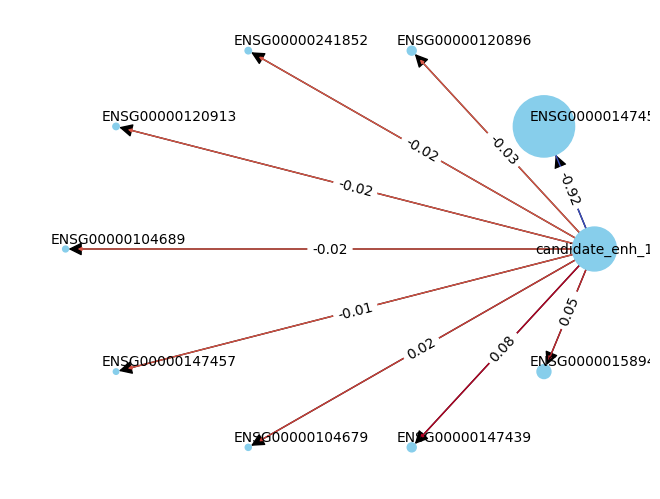

In [293]:
plot_network(
    mdata, 
    central_node="candidate_enh_1",
    source_column="intended_target_name",
    target_column="gene_id",
    weight_column="log2_fc",
    min_weight=0.01,
    node_size_column="-log10_posterior_probability",
)

/tmp/ipykernel_1088817/3490810.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


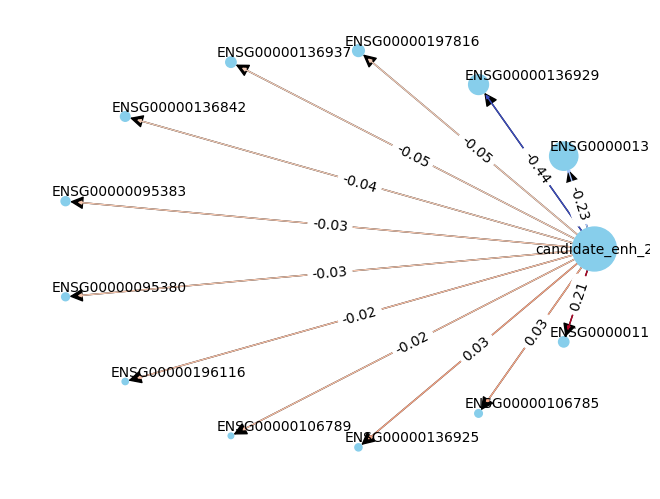

In [166]:
plot_network(
    mdata, 
    central_node="candidate_enh_2",
    source_column="intended_target_name",
    target_column="gene_id",
    weight_column="log2_fc",
    min_weight=0.01,
    node_size_column="-log10_posterior_probability",
)

/tmp/ipykernel_1088817/3490810.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


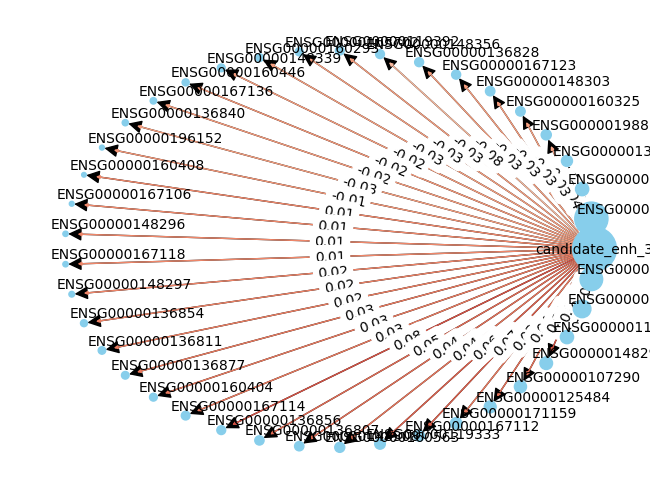

In [163]:
plot_network(
    mdata, 
    central_node="candidate_enh_3",
    source_column="intended_target_name",
    target_column="gene_id",
    weight_column="log2_fc",
    min_weight=0.01,
    node_size_column="-log10_posterior_probability",
)

/tmp/ipykernel_1088817/3490810.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


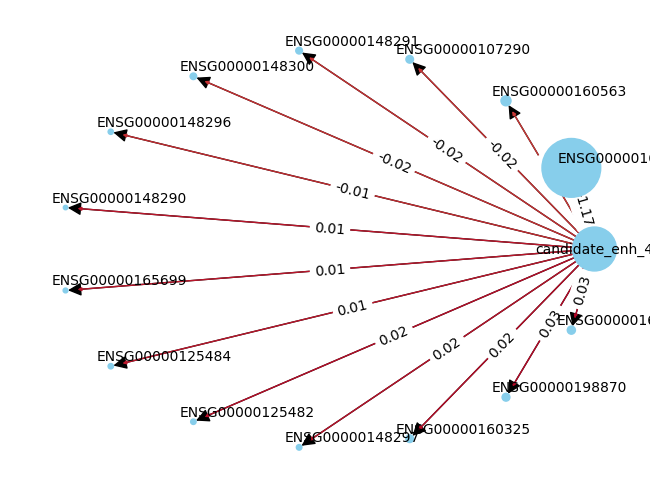

In [164]:
plot_network(
    mdata, 
    central_node="candidate_enh_4",
    source_column="intended_target_name",
    target_column="gene_id",
    weight_column="log2_fc",
    min_weight=0.01,
    node_size_column="-log10_posterior_probability",
)

/tmp/ipykernel_1088817/3490810.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


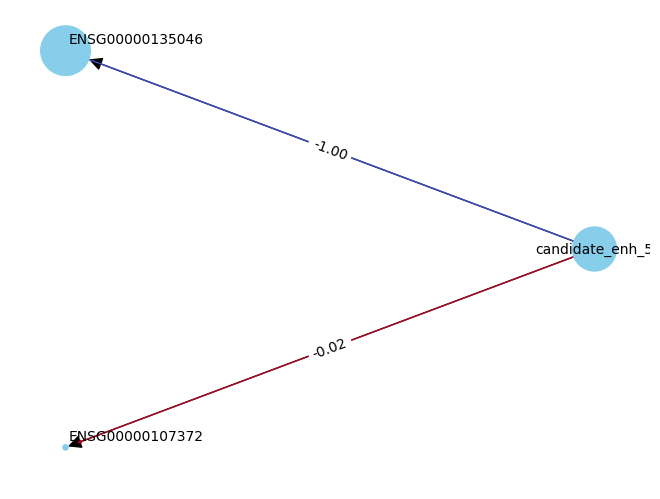

In [165]:
plot_network(
    mdata, 
    central_node="candidate_enh_5",
    source_column="intended_target_name",
    target_column="gene_id",
    weight_column="log2_fc",
    min_weight=0.01,
    node_size_column="-log10_posterior_probability",
)

In [ ]:
plot_network(
    mdata, 
    central_node="candidate_enh_1",
    source_column="intended_target_name",
    target_column="gene_id",
    weight_column="log2_fc",
    min_weight=0.01,
    node_size_column="-log10_posterior_probability",
)

# Scratch

In [ ]:
def plot_network(
    mdata: MuData,
    central_node: Optional[str] = None,
    results_key: Optional[str] = "test_results",
    add_nontargeting_gene_exp: bool = False,
    min_weight: Optional[float] = None,
    source_column: str = "source",
    target_column: str = "target",
    edge_transparency_column: Optional[str] = None,
    edge_color_column: Optional[str] = None,
    node_size_column: Optional[str] = None,
):

    # Get and filter the results dataframe
    results_df = mdata.uns[results_key]
    if min_weight is not None:
        results_df = results_df[results_df[weight_column].abs() >= min_weight]
    if central_node is not None:
        results_df = results_df[results_df[source_column] == central_node]

    # Add nontargeting gene expression if requested
    if add_nontargeting_gene_exp:
        add_nontargeting_gene_exp_col(mdata)
        results_df = results_df.merge(mdata.mod["gene"].var, left_on=target_column, right_index=True, how="left")

    # Create the network 
    G = nx.DiGraph()
    for i, row in results_df.iterrows():
        G.add_edge(row[source_column], row[target_column], weight=row[weight_column])
    pos = nx.circular_layout(G)

    # Draw nodes based on node size column if provided
    if node_size_column is not None:
        node_size = results_df.set_index(target_column)[node_size_column].to_dict()
        sizes = [node_size.get(n, 10) for n in G.nodes]
        sizes = [s * 100 for s in sizes]
        nx.draw(G, pos, node_color="skyblue", node_size=sizes, edge_cmap=plt.cm.Blues, arrowsize=20)
    else:
        nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=150, edge_cmap=plt.cm.Blues, arrowsize=20)

    # Offset labels
    if central_node is not None:
        label_pos = {k: (v[0]+0.2, v[1] + 0.05) for k, v in pos.items() if k != central_node}  # Adjust 0.1 as needed for the offset
        label_pos[central_node] = pos[central_node]
        nx.draw_networkx_labels(G, label_pos, font_size=10)
    else:
        label_pos = {k: (v[0]+0.2, v[1] + 0.05) for k, v in pos.items()}
        nx.draw_networkx_labels(G, pos, font_size=8)
    
    # Draw edges
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edges(G, pos, edge_color=[d["weight"] for u, v, d in G.edges(data=True)], edge_cmap=plt.cm.coolwarm, arrowsize=5)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Plt
    plt.tight_layout()
    plt.show()
    

In [ ]:
plot_network(
    mdata, 
    central_node="candidate_enh_1",
    source_column="intended_target_name",
    target_column="gene_id",
    weight_column="log2_fc",
    min_weight=0.01,
    node_size_column="mean_nontarge`ting_expression",
    add_nontargeting_gene_exp=True,
)